In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
from imp import reload
import pixie_read_st as pxr

In [2]:
from scipy.integrate import romb
from scipy.integrate import simps

In [3]:
from matplotlib import animation, rc
import matplotlib.animation as animation
import types
from IPython.display import HTML

In [4]:
def setvisible(self,vis):
    for c in self.collections: c.set_visible(vis)
def setanimated(self,ani):
    for c in self.collections: c.set_animated(ani)

In [5]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True

In [6]:
filepath = "/lustre/scratch4/turquoise/jmhamilton/pixie3d-300x.scratch/"

In [7]:
reload(pxr)

<module 'pixie_read_st' from '/users/jmhamilton/diagnostics_pixie3d/diagnostics_keramidas/modules/pixie3d_utilities/pixie_read_st.py'>

In [8]:
pxr.pixieload(filepath + "pixie3d.h5")

timesteps= 1738
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Te', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J^1', 'J^2', 'J^3', 'JxRho', 'JxTe', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'F_1', 'F_2', 'F_3', 'Int. heat src', 'Poloidal flux', 'chi par', 'chi perp', 'diff', 'eta', 'h_eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'pi+pe', 'q factor', '|J|']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Rho_pert', 'Te_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


In [9]:
B1_try = pxr.load_array(1,0,None,2)

In [10]:
B1_try.shape

(128, 64, 32, 2)

In [11]:
Vx = pxr.load_array(0,10,400,500)

In [12]:
# contravariant B-field
B1 = pxr.load_array(1,0,400,500)
#B2 = pxr.load_array(1,1,None,58)
#B3 = pxr.load_array(1,2,None,58)
# covariant B-field
#B_1 = pxr.load_array(2,0,400,500)
#B_2 = pxr.load_array(2,1,None,58)
#B_3 = pxr.load_array(2,2,None,58)
# Cartesian B-field
#Bx = pxr.load_array(0,0,None,58)
#By = pxr.load_array(0,1,None,58)
#Bz = pxr.load_array(0,2,None,58)
# Flux and toroidal current
#psi_pol = pxr.load_array(3,7,None,1)
#J3 = pxr.load_array(2,5,None,58)

In [13]:
J3_0 = pxr.load_array(2,5,0,1)
J3_1 = pxr.load_array(2,5,250,251)
J3_2 = pxr.load_array(2,5,500,501)
J3_3 = pxr.load_array(2,5,750,751)
J3_4 = pxr.load_array(2,5,986,987)
J3_5 = pxr.load_array(2,5,1250,1251)
J3_6 = pxr.load_array(2,5,1450,1451)
J3_7 = pxr.load_array(2,5,1550,1551)
J3_8 = pxr.load_array(2,5,1650,1651)
J3_9 = pxr.load_array(2,5,1700,1701) #changed by JMHAMILTON

In [14]:
J3_0_tor = np.mean(J3_0,axis=2)
J3_1_tor = np.mean(J3_1,axis=2)
J3_2_tor = np.mean(J3_2,axis=2)
J3_3_tor = np.mean(J3_3,axis=2)
J3_4_tor = np.mean(J3_4,axis=2)
J3_5_tor = np.mean(J3_5,axis=2)
J3_6_tor = np.mean(J3_6,axis=2)
J3_7_tor = np.mean(J3_7,axis=2)
J3_8_tor = np.mean(J3_8,axis=2)
J3_9_tor = np.mean(J3_9,axis=2)

In [17]:
rho_0 = pxr.load_array(0,13,0,1)
rho_1 = pxr.load_array(0,13,250,251)
rho_2 = pxr.load_array(0,13,500,501)
rho_3 = pxr.load_array(0,13,750,751)
rho_4 = pxr.load_array(0,13,986,987)
rho_5 = pxr.load_array(0,13,1250,1251)
rho_6 = pxr.load_array(0,13,1450,1451)
rho_7 = pxr.load_array(0,13,1550,1551)
rho_8 = pxr.load_array(0,13,1650,1651)
rho_9 = pxr.load_array(0,13,1700,1701) #changed by JMHAMILTON

In [18]:
rho_0_tor = np.mean(rho_0,axis=2)
rho_1_tor = np.mean(rho_1,axis=2)
rho_2_tor = np.mean(rho_2,axis=2)
rho_3_tor = np.mean(rho_3,axis=2)
rho_4_tor = np.mean(rho_4,axis=2)
rho_5_tor = np.mean(rho_5,axis=2)
rho_6_tor = np.mean(rho_6,axis=2)
rho_7_tor = np.mean(rho_7,axis=2)
rho_8_tor = np.mean(rho_8,axis=2)
rho_9_tor = np.mean(rho_9,axis=2)

In [20]:
Te_0 = pxr.load_array(0,6,0,1)
Te_1 = pxr.load_array(0,6,250,251)
Te_2 = pxr.load_array(0,6,500,501)
Te_3 = pxr.load_array(0,6,750,751)
Te_4 = pxr.load_array(0,6,986,987)
Te_5 = pxr.load_array(0,6,1250,1251)
Te_6 = pxr.load_array(0,6,1450,1451)
Te_7 = pxr.load_array(0,6,1550,1551)
Te_8 = pxr.load_array(0,6,1650,1651)
Te_9 = pxr.load_array(0,6,1700,1701) #changed by JMHAMILTON

In [21]:
Te_0_tor = np.mean(Te_0,axis=2)
Te_1_tor = np.mean(Te_1,axis=2)
Te_2_tor = np.mean(Te_2,axis=2)
Te_3_tor = np.mean(Te_3,axis=2)
Te_4_tor = np.mean(Te_4,axis=2)
Te_5_tor = np.mean(Te_5,axis=2)
Te_6_tor = np.mean(Te_6,axis=2)
Te_7_tor = np.mean(Te_7,axis=2)
Te_8_tor = np.mean(Te_8,axis=2)
Te_9_tor = np.mean(Te_9,axis=2)

In [22]:
P0 = np.multiply(rho_0_tor,Te_0_tor)
P1 = np.multiply(rho_1_tor,Te_1_tor)
P2 = np.multiply(rho_2_tor,Te_2_tor)
P3 = np.multiply(rho_3_tor,Te_3_tor)
P4 = np.multiply(rho_4_tor,Te_4_tor)
P5 = np.multiply(rho_5_tor,Te_5_tor)
P6 = np.multiply(rho_6_tor,Te_6_tor)
P7 = np.multiply(rho_7_tor,Te_7_tor)
P8 = np.multiply(rho_8_tor,Te_8_tor)
P9 = np.multiply(rho_9_tor,Te_9_tor)

In [23]:
J3 = pxr.load_array(2,5,250,493)
rho = pxr.load_array(0,13,250,493)
Te = pxr.load_array(0,6,250,493)

In [24]:
J30 = pxr.load_array(2,5,0,1)
rho0 = pxr.load_array(0,13,0,1)
Te0 = pxr.load_array(0,6,0,1)

In [25]:
J30_tor = np.mean(J30,axis=2)
rho0_tor = np.mean(rho0,axis=2)
Te0_tor = np.mean(Te0,axis=2)

In [26]:
J3_tor = np.mean(J3,axis=2)
rho_tor = np.mean(rho,axis=2)
Te_tor = np.mean(Te,axis=2)

In [27]:
J3f = pxr.load_array(2,5,824,825)
rhof = pxr.load_array(0,13,824,825)
Tef = pxr.load_array(0,6,824,825)

In [28]:
J3f_tor = np.mean(J3f,axis=2)
rhof_tor = np.mean(rhof,axis=2)
Tef_tor = np.mean(Tef,axis=2)

In [29]:
Pressure0 = np.multiply(rho0_tor,Te0_tor)

In [30]:
Pressure = np.multiply(rho_tor,Te_tor)

In [31]:
Pressuref = np.multiply(rhof_tor,Tef_tor)

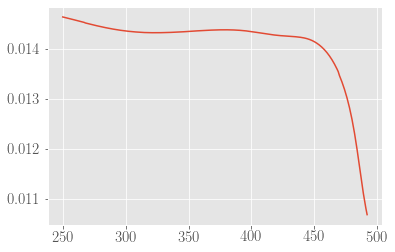

In [32]:
plt.plot([x for x in range(250,493)],Pressure[0,0,:])
plt.show()

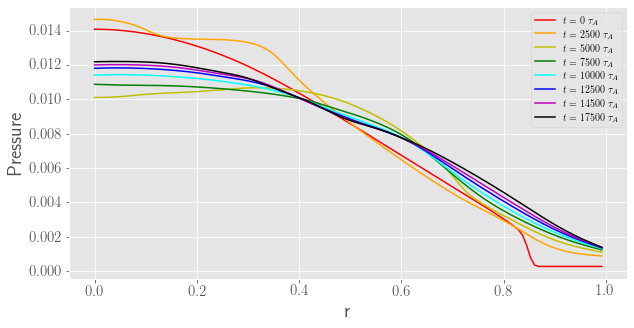

In [33]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P0[:,0,0],"r",label=r"$t=0\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P1[:,0,0],"orange",label=r"$t=2500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P2[:,0,-1],"y",label=r"$t=5000\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P3[:,0,-1],"g",label=r"$t=7500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P4[:,0,-1],"cyan",label=r"$t=10000\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P5[:,0,-1],"b",label=r"$t=12500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P6[:,0,-1],"m",label=r"$t=14500\;\tau_A$")
#plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P7[:,0,-1],"fuchsia",label=r"$t=15500\;\tau_A$")
#plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P8[:,0,-1],"gold",label=r"$t=16500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P9[:,0,-1],"k",label=r"$t=17500\;\tau_A$")
plt.legend()
plt.xlabel("r")
plt.ylabel("Pressure")
plt.show()

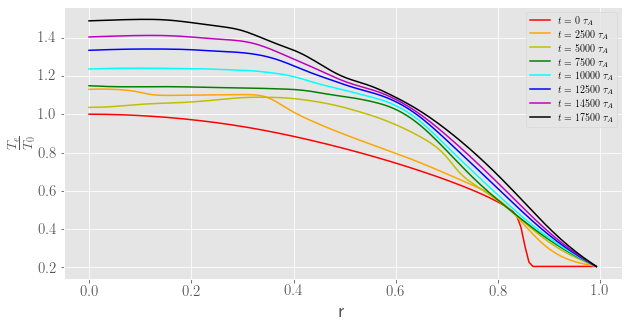

In [34]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], [x/Te_0_tor[0,0,0] for x in Te_0_tor[:,0,0]],"r",label=r"$t=0\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], [x/Te_0_tor[0,0,0] for x in Te_1_tor[:,0,0]],"orange",label=r"$t=2500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], [x/Te_0_tor[0,0,0] for x in Te_2_tor[:,0,0]],"y",label=r"$t=5000\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], [x/Te_0_tor[0,0,0] for x in Te_3_tor[:,0,0]],"green",label=r"$t=7500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], [x/Te_0_tor[0,0,0] for x in Te_4_tor[:,0,0]],"cyan",label=r"$t=10000\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], [x/Te_0_tor[0,0,0] for x in Te_5_tor[:,0,0]],"b",label=r"$t=12500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], [x/Te_0_tor[0,0,0] for x in Te_6_tor[:,0,0]],"m",label=r"$t=14500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], [x/Te_0_tor[0,0,0] for x in Te_9_tor[:,0,0]],"k",label=r"$t=17500\;\tau_A$")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$\frac{T_e}{T_0}$")
plt.show()

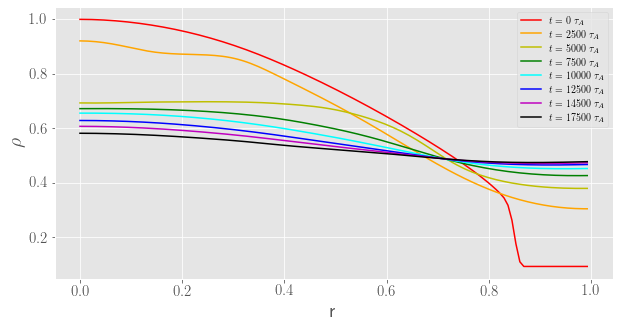

In [35]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], rho_0_tor[:,0,0],"r",label=r"$t=0\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], rho_1_tor[:,0,0],"orange",label=r"$t=2500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], rho_2_tor[:,0,-1],"y",label=r"$t=5000\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], rho_3_tor[:,0,-1],"g",label=r"$t=7500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], rho_4_tor[:,0,-1],"cyan",label=r"$t=10000\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], rho_5_tor[:,0,-1],"b",label=r"$t=12500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], rho_6_tor[:,0,-1],"m",label=r"$t=14500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], rho_9_tor[:,0,-1],"k",label=r"$t=17500\;\tau_A$")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$\rho$")
plt.show()

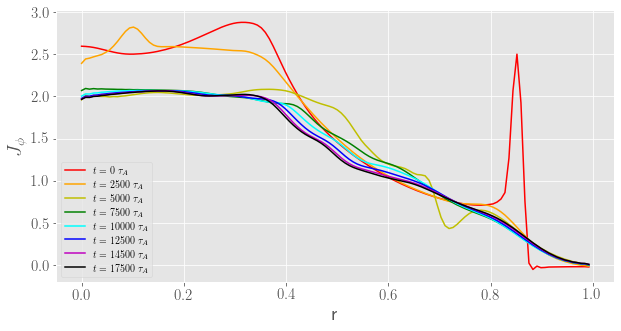

In [36]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], -J3_0_tor[:,0,0],"r",label=r"$t=0\;\tau_A$")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], -J3_1_tor[:,0,0],"orange",label=r"$t=2500\;\tau_A$")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], -J3_2_tor[:,0,-1],"y",label=r"$t=5000\;\tau_A$")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], -J3_3_tor[:,0,-1],"g",label=r"$t=7500\;\tau_A$")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], -J3_4_tor[:,0,-1],"cyan",label=r"$t=10000\;\tau_A$")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], -J3_5_tor[:,0,-1],"b",label=r"$t=12500\;\tau_A$")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], -J3_6_tor[:,0,-1],"m",label=r"$t=14500\;\tau_A$")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], -J3_7_tor[:,0,-1],"k",label=r"$t=17500\;\tau_A$")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$J_{\phi}$")
plt.show()

In [38]:
Ipru0 = []
Ipru1 = []
Ipru2 = []
Ipru3 = []
Ipruf = []
for r_ind in range(J3_0.shape[0]):
    for u_ind in range(J3_0.shape[1]):
        Ipru0.append(simps(J3_0[r_ind,u_ind,:,0],dx=2*np.pi/(J3_0.shape[2]-1)))
        Ipru1.append(simps(J3_1[r_ind,u_ind,:,0],dx=2*np.pi/(J3_0.shape[2]-1)))
        Ipru2.append(simps(J3_2[r_ind,u_ind,:,0],dx=2*np.pi/(J3_0.shape[2]-1)))
        Ipru3.append(simps(J3_3[r_ind,u_ind,:,0],dx=2*np.pi/(J3_0.shape[2]-1)))
        Ipruf.append(simps(J3f[r_ind,u_ind,:,0],dx=2*np.pi/(J3_0.shape[2]-1))) # typo fixed by JMHAMILTON

In [39]:
Ipru0 = np.reshape(Ipru0,(J3_0.shape[0],J3_0.shape[1]))
Ipru1 = np.reshape(Ipru1,(J3_0.shape[0],J3_0.shape[1]))
Ipru2 = np.reshape(Ipru2,(J3_0.shape[0],J3_0.shape[1]))
Ipru3 = np.reshape(Ipru3,(J3_0.shape[0],J3_0.shape[1]))
Ipruf = np.reshape(Ipruf,(J3_0.shape[0],J3_0.shape[1]))

In [40]:
Ipru0[12,12]

-15.519005884211278

In [41]:
Ipr0 = []
Ipr1 = []
Ipr2 = []
Ipr3 = []
Iprf = []
for r_ind in range(J3_0.shape[0]):
    Ipr0.append(simps(Ipru0[r_ind,:],dx=2*np.pi/(J3_0.shape[1]-1)))
    Ipr1.append(simps(Ipru1[r_ind,:],dx=2*np.pi/(J3_0.shape[1]-1)))
    Ipr2.append(simps(Ipru2[r_ind,:],dx=2*np.pi/(J3_0.shape[1]-1)))
    Ipr3.append(simps(Ipru3[r_ind,:],dx=2*np.pi/(J3_0.shape[1]-1)))
    Iprf.append(simps(Ipruf[r_ind,:],dx=2*np.pi/(J3_0.shape[1]-1)))

In [42]:
Ip0 = simps(np.asarray(Ipr0[:]),dx=1/(J3_0.shape[0]-1))
Ip1 = simps(np.asarray(Ipr1[:]),dx=1/(J3_0.shape[0]-1))
Ip2 = simps(np.asarray(Ipr2[:]),dx=1/(J3_0.shape[0]-1))
Ip3 = simps(np.asarray(Ipr3[:]),dx=1/(J3_0.shape[0]-1))
Ipf = simps(np.asarray(Iprf[:]),dx=1/(J3_0.shape[0]-1))

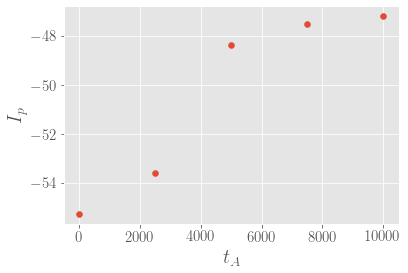

In [43]:
Ip_time_list = [0,2500,5000,7500,10000]
plt.scatter(Ip_time_list,[Ip0,Ip1,Ip2,Ip3,Ipf])
plt.xlabel(r"$t_A$")
plt.ylabel(r"$I_p$")
plt.show()

In [45]:
eta0 = (Te_0_tor[0,0,0]/Te_0_tor[0,0,0])**(-3/2)
eta1 = (Te_1_tor[0,0,0]/Te_0_tor[0,0,0])**(-3/2)
eta2 = (Te_2_tor[0,0,0]/Te_0_tor[0,0,0])**(-3/2)
eta3 = (Te_3_tor[0,0,0]/Te_0_tor[0,0,0])**(-3/2)
etaf = (Tef_tor[0,0,0]/Te_0_tor[0,0,0])**(-3/2)

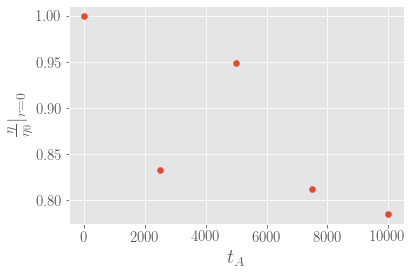

In [46]:
plt.scatter(Ip_time_list,[eta0,eta1,eta2,eta3,etaf])
plt.xlabel(r"$t_A$")
plt.ylabel(r"$\frac{\eta}{\eta_0}|_{r=0}$")
plt.show()

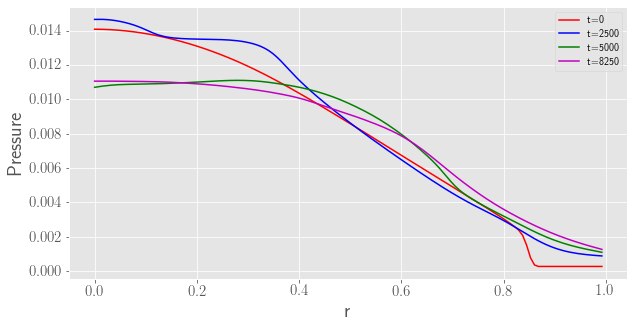

In [47]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/Pressure.shape[0] for x in range(Pressure.shape[0])], Pressure0[:,0,0],"r",label="t=0")
plt.plot([x/Pressure.shape[0] for x in range(Pressure.shape[0])], Pressure[:,0,0],"b",label="t=2500")
plt.plot([x/Pressure.shape[0] for x in range(Pressure.shape[0])], Pressure[:,0,-1],"g",label="t=5000")
plt.plot([x/Pressure.shape[0] for x in range(Pressure.shape[0])], Pressuref[:,0,-1],"m",label="t=8250")
plt.legend()
plt.xlabel("r")
plt.ylabel("Pressure")
plt.show()

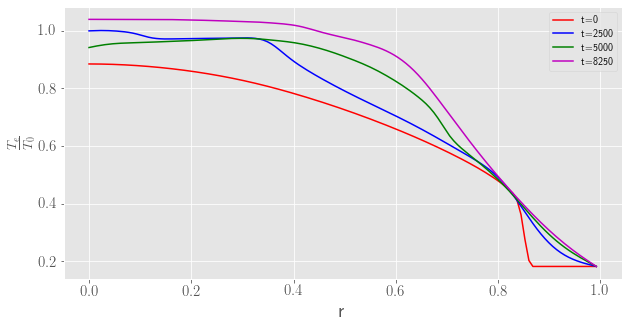

In [48]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/Pressure.shape[0] for x in range(Pressure.shape[0])], [x/Te_tor[0,0,0] for x in Te0_tor[:,0,0]],"r",label="t=0")
plt.plot([x/Pressure.shape[0] for x in range(Pressure.shape[0])], [x/Te_tor[0,0,0] for x in Te_tor[:,0,0]],"b",label="t=2500")
plt.plot([x/Pressure.shape[0] for x in range(Pressure.shape[0])], [x/Te_tor[0,0,0] for x in Te_tor[:,0,-1]],"g",label="t=5000")
plt.plot([x/Pressure.shape[0] for x in range(Pressure.shape[0])], [x/Te_tor[0,0,0] for x in Tef_tor[:,0,-1]],"m",label="t=8250")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$\frac{T_e}{T_0}$")
plt.show()

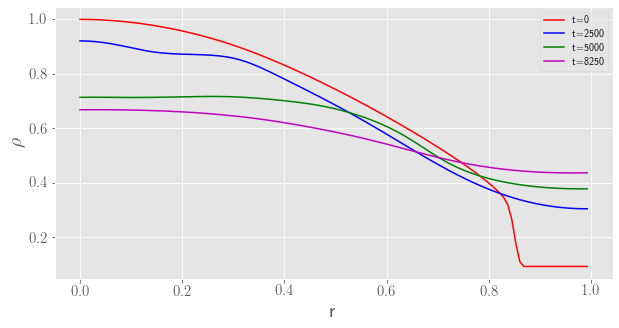

In [49]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/Pressure.shape[0] for x in range(Pressure.shape[0])], rho0_tor[:,0,0],"r",label="t=0")
plt.plot([x/Pressure.shape[0] for x in range(Pressure.shape[0])], rho_tor[:,0,0],"b",label="t=2500")
plt.plot([x/Pressure.shape[0] for x in range(Pressure.shape[0])], rho_tor[:,0,-1],"g",label="t=5000")
plt.plot([x/Pressure.shape[0] for x in range(Pressure.shape[0])], rhof_tor[:,0,-1],"m",label="t=8250")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$\rho$")
plt.show()

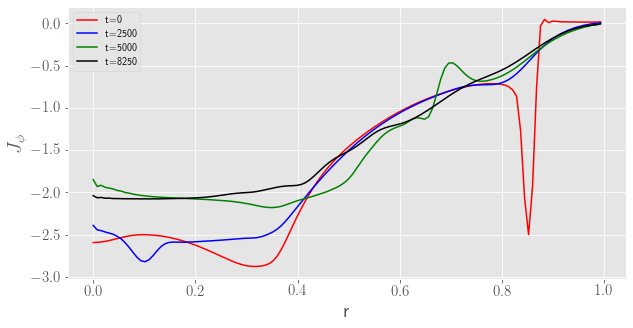

In [50]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/J3.shape[0] for x in range(J3.shape[0])], J30[:,0,0],"r",label="t=0")
plt.plot([x/J3.shape[0] for x in range(J3.shape[0])], J3_tor[:,0,0],"b",label="t=2500")
plt.plot([x/J3.shape[0] for x in range(J3.shape[0])], J3_tor[:,0,-1],"g",label="t=5000")
plt.plot([x/J3.shape[0] for x in range(J3.shape[0])], J3f_tor[:,0,-1],"k",label="t=8250")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$J_{\phi}$")
plt.show()

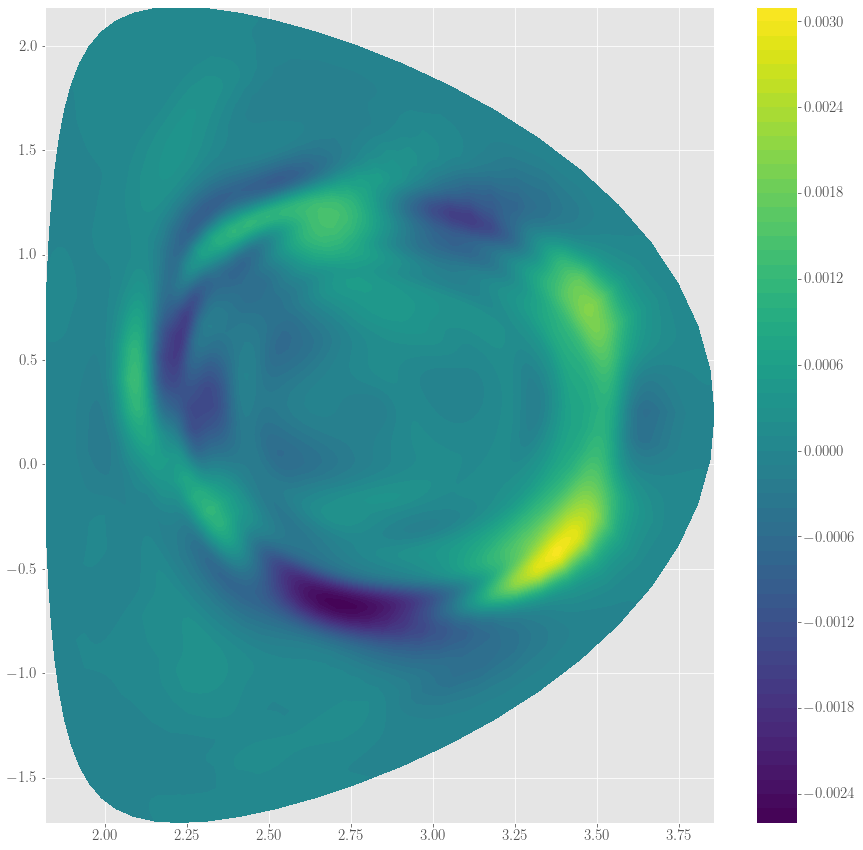

In [51]:
plt.figure(figsize=(15,15))
plt.contourf(pxr.X[:,:,0],pxr.Z[:,:,0],Tef[:,:,0,-1]-Tef_tor[:,:,-1],60)
plt.colorbar()
plt.show()

In [107]:
plt.figure(figsize=(15,15))
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psi_pol[:,:,0,0],80)
plt.colorbar()
plt.show()

NameError: name 'psi_pol' is not defined

In [199]:
psi_pol.shape

(129, 65, 33, 1)

In [63]:
#J1 = pxr.load_array(2,3,None,58)
#J2 = pxr.load_array(2,4,None,58)

In [54]:
V_1 = pxr.load_array(2,7,400,500)
#V_2 = pxr.load_array(2,8,None,58)
#V_3 = pxr.load_array(2,9,None,58)

In [55]:
B1_tor = np.mean(B1, axis=2)
V1_tor = np.mean(V_1,axis=2)

## Perturbations

In [56]:
dB1 = B1-B1_tor[:,:,np.newaxis,:]
dV1 = V_1-V1_tor[:,:,np.newaxis,:]

## Growth Rate

In [66]:
time = [x for x in range(100)]
r = [x for x in range(128)]

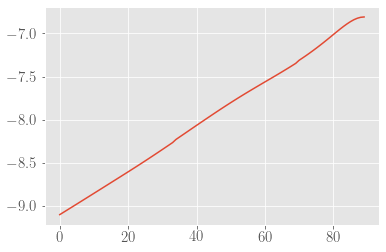

In [67]:
plt.plot(time[:-10],np.log(np.sqrt(dV1[55,0,0,:-10]**2)))
plt.show()

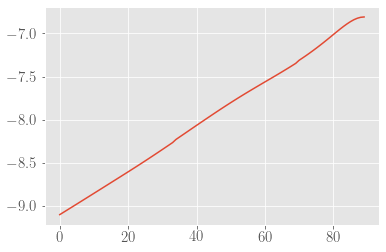

In [68]:
plt.plot(time[:-10],np.log(np.sqrt(dV1[55,0,0,:-10]**2)))
plt.show()

In [69]:
np.polyfit(time[:-10],np.log(np.sqrt(dV1[55,0,0,:-10]**2)),deg=1)

array([ 0.02608243, -9.11717051])

$\gamma = 0.003 (\tau_A)^{-1}$

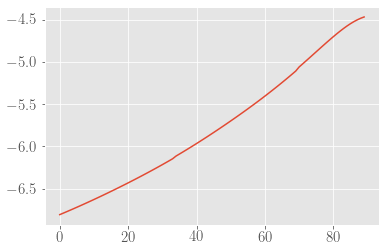

In [70]:
plt.plot(time[:-10],np.log(np.sqrt(dB1[55,0,0,:-10]**2)))
plt.show()

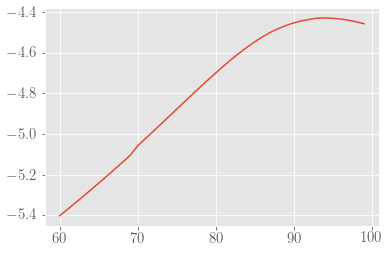

In [71]:
plt.plot(time[60:200],np.log(np.sqrt(dB1[55,0,0,60:200]**2))) # Not sure what Giannis did as times 60:200 is OOB
plt.show()

In [72]:
np.polyfit(time[:-10],np.log(np.sqrt(dB1[55,0,0,:-10]**2)),deg=1)

array([ 0.0271194 , -6.96725068])

## Fourier mode-toroidal

In [58]:
db1w = np.fft.fft(dB1,axis=2)

In [59]:
dv1w = np.fft.fft(dV1,axis=2)

In [60]:
simps(db1w[55,:,0,10],dx = 2*np.pi/63)

(2.070165004785939e-17+0j)

In [61]:
db1wrt = []
for r_ind in range(db1w.shape[0]):
    for n_ind in range(db1w.shape[2]):
        for t_ind in range(db1w.shape[3]):
            db1wrt.append(simps(db1w[r_ind,:,n_ind,t_ind],dx=2*np.pi/(db1w.shape[1]-1)))

In [62]:
db1wrt = np.reshape(db1wrt,(db1w.shape[0],db1w.shape[2],db1w.shape[3]))

In [63]:
db1wt = []
for n_ind in range(db1w.shape[2]):
    for t_ind in range(db1w.shape[3]):
        db1wt.append(simps(db1wrt[:,n_ind,t_ind],dx=1/(db1w.shape[0]-1)))

In [64]:
db1wt = np.reshape(db1wt,(db1w.shape[2],db1w.shape[3]))

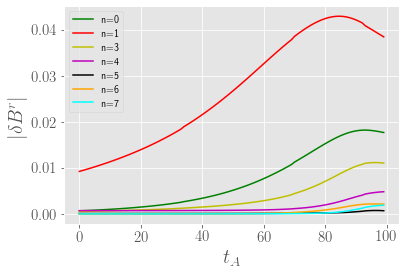

In [73]:
plt.plot(time,np.abs(db1wt[-2,:]),"g",label="n=0")
plt.plot(time,np.abs(db1wt[1,:]),"r",label="n=1")
#plt.plot(time,np.abs(db1wt[2,:]),"b",label="n=2")
plt.plot(time,np.abs(db1wt[3,:]),"y",label="n=3")
plt.plot(time,np.abs(db1wt[4,:]),"m",label="n=4")
plt.plot(time,np.abs(db1wt[5,:]),"k",label="n=5")
plt.plot(time,np.abs(db1wt[6,:]),"orange",label="n=6")
plt.plot(time,np.abs(db1wt[7,:]),"cyan",label="n=7")
plt.xlabel("$t_A$")
plt.ylabel("$|\delta B^r|$")
plt.legend()
plt.show()

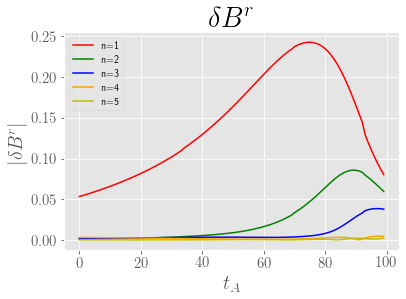

In [74]:
rloc = 20
plt.title("$\delta B^r$")
plt.plot(time, np.abs(db1w[rloc,0,1,:]),"r",label="n=1")
plt.plot(time, np.abs(db1w[rloc,0,2,:]),"g",label="n=2")
plt.plot(time, np.abs(db1w[rloc,0,3,:]),"b",label="n=3")
plt.plot(time, np.abs(db1w[rloc,0,4,:]),"orange",label="n=4")
plt.plot(time, np.abs(db1w[rloc,0,5,:]),"y",label="n=5")
plt.xlabel("$t_A$")
plt.ylabel("$|\delta B^r|$")
plt.legend()
plt.show() # Again, not sure what times Giannis is looking at

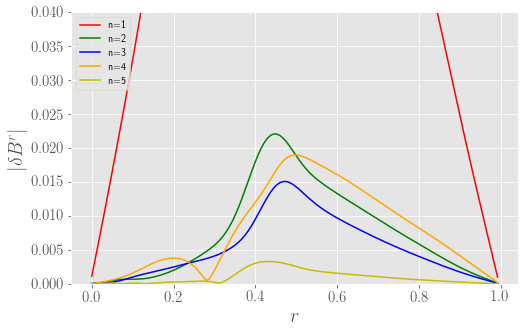

In [75]:
fig = plt.figure(figsize=(8,5))
plt.xlabel("$r$")
plt.ylabel("$|\delta B^r|$")
plt.ylim(0.0,0.04)
plt.plot([rloc/128 for rloc in r], np.abs(db1w[:,0,1,0]),"r",label="n=1")
plt.plot([rloc/128 for rloc in r], np.abs(db1w[:,0,2,0]),"g",label="n=2")
plt.plot([rloc/128 for rloc in r], np.abs(db1w[:,0,3,0]),"b",label="n=3")
plt.plot([rloc/128 for rloc in r], np.abs(db1w[:,0,4,0]),"orange",label="n=4")
plt.plot([rloc/128 for rloc in r], np.abs(db1w[:,0,5,0]),"y",label="n=5")
plt.legend(loc=2)

ims = []

for i in range(len(time)):
    im1 = plt.plot([rloc/128 for rloc in r],np.abs(db1w[:,0,1,i]),"r",label="n=1")
    im2 = plt.plot([rloc/128 for rloc in r],np.abs(db1w[:,0,2,i]),"g",label="n=2")
    im3 = plt.plot([rloc/128 for rloc in r],np.abs(db1w[:,0,3,i]),"b",label="n=3")
    im4 = plt.plot([rloc/128 for rloc in r],np.abs(db1w[:,0,4,i]),"orange",label="n=4")
    im5 = plt.plot([rloc/128 for rloc in r],np.abs(db1w[:,0,5,i]),"y",label="n=5")
    text = 't = '+str(i*10)+ r'$\;\tau_A$'
    an = plt.annotate(text, xy=(0.8, 0.94), xycoords='axes fraction',fontsize=14)


    ims.append(im1 + im2 + im3 + im4 + im5 + [an])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=False,repeat_delay=100)

In [76]:
HTML(ani.to_html5_video())

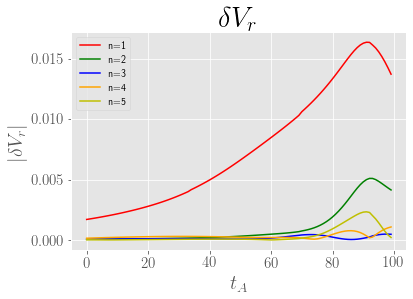

In [77]:
rloc = 30
plt.title("$\delta V_r$ ")
plt.plot(time, np.abs(dv1w[rloc,0,1,:]),"r",label="n=1")
plt.plot(time, np.abs(dv1w[rloc,0,2,:]),"g",label="n=2")
plt.plot(time, np.abs(dv1w[rloc,0,3,:]),"b",label="n=3")
plt.plot(time, np.abs(dv1w[rloc,0,4,:]),"orange",label="n=4")
plt.plot(time, np.abs(dv1w[rloc,0,5,:]),"y",label="n=5")
plt.legend()
plt.xlabel("$t_A$")
plt.ylabel("$|\delta V_r|$")
plt.show()

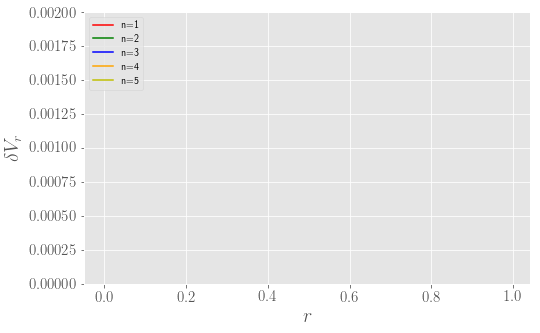

In [177]:
fig = plt.figure(figsize=(8,5))
plt.xlabel("$r$")
plt.ylabel("$\delta V_r$")
plt.ylim(0.0,0.002)
im10 = plt.plot([rloc/128 for rloc in r], np.abs(dv1w[:,0,1,0]),"r",label="n=1")
im20 = plt.plot([rloc/128 for rloc in r], np.abs(dv1w[:,0,2,0]),"g",label="n=2")
im30 = plt.plot([rloc/128 for rloc in r], np.abs(dv1w[:,0,3,0]),"b",label="n=3")
im40 = plt.plot([rloc/128 for rloc in r], np.abs(dv1w[:,0,4,0]),"orange",label="n=4")
im50 = plt.plot([rloc/128 for rloc in r], np.abs(dv1w[:,0,5,0]),"y",label="n=5")
plt.legend(loc=2)

ims = [im10,im20,im30,im40,im50]

for i in range(len(time)):
    im1 = plt.plot([rloc/128 for rloc in r],np.abs(dv1w[:,0,1,i]),"r",label="n=1")
    im2 = plt.plot([rloc/128 for rloc in r],np.abs(dv1w[:,0,2,i]),"g",label="n=2")
    im3 = plt.plot([rloc/128 for rloc in r],np.abs(dv1w[:,0,3,i]),"b",label="n=3")
    im4 = plt.plot([rloc/128 for rloc in r],np.abs(dv1w[:,0,4,i]),"orange",label="n=4")
    im5 = plt.plot([rloc/128 for rloc in r],np.abs(dv1w[:,0,5,i]),"y",label="n=5")
    text = 't = '+str(i*10)+ r'$\;\tau_A$'
    an = plt.annotate(text, xy=(0.8, 0.94), xycoords='axes fraction',fontsize=14)


    ims.append(im1 + im2 + im3 + im4 + im5 + [an])

ani2 = animation.ArtistAnimation(fig, ims, interval=200, blit=False,repeat_delay=100)

In [178]:
HTML(ani2.to_html5_video())

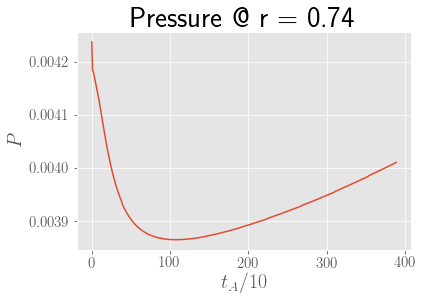

In [179]:
plt.title("Pressure @ r = 0.74")
plt.plot(time,Pressure[95,0,:])
plt.xlabel("$t_A/10$")
plt.ylabel("$P$")
plt.show()

In [186]:
35/128

0.2734375

In [64]:
Pressure = np.multiply(rho_tor,Te_tor)

In [53]:
rho = pxr.load_array(0,13,None,390)

In [54]:
rho_tor = np.mean(rho,axis=2)

In [51]:
Te = pxr.load_array(0,6,None,390)

In [52]:
Te_tor = np.mean(Te,axis=2)

In [68]:
dTe = Te - Te_tor[:,:,np.newaxis,:]

In [69]:
#psit = np.mean(psi_pol,axis=2)

In [70]:
pxr.Grid_for_Cell_Interpolation(B1)
pxr.Axes_of_Interpolation(psi_pol)
pxr.Grid_Cell_Interpolations(B1,B2,B3,psi_pol,J3)
pxr.Grid_Cell_Interpolations_Covariant(B_1,B_2,B_3)
pxr.MeshGrids_Creation()
B1,B2,B3,J3,psi = pxr.C2N_Evaluations()
psit = np.mean(psi,axis=2)
B_1,B_2,B_3 = pxr.C2N_Evaluations_Covariant()
pxr.Grid_Interpolations(psit,B1,B2,B3,J3)

Logical Grid Interpolations done. All array (A) interpolators take A_int.


In [71]:
r = np.linspace(0,1,Bx.shape[0])

In [72]:
J3_tor = np.mean(J3,axis=2)

In [73]:
J3_tor0 = J3_tor[:,:,0]

In [74]:
dJ3 = J3-J3_tor[:,:,np.newaxis,:]

In [75]:
dJ30 = J3-J3_tor0[:,:,np.newaxis,np.newaxis]

In [76]:
alpha = 2.18095

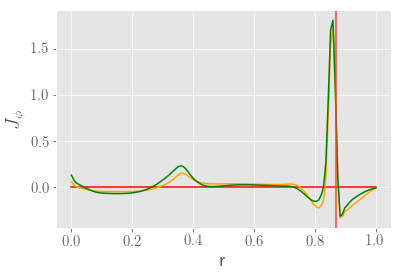

In [79]:
plt.plot(r,dJ30[:,0,0,0],"r")
plt.plot(r,dJ30[:,0,0,20],"orange")
plt.plot(r,dJ30[:,0,0,-1],"g")
#plt.plot(r,dJ30[:,0,0,-1],"b")
plt.axvline(x=0.87)
plt.xlabel("r")
plt.ylabel(r"$J_{\phi}$")
plt.show()

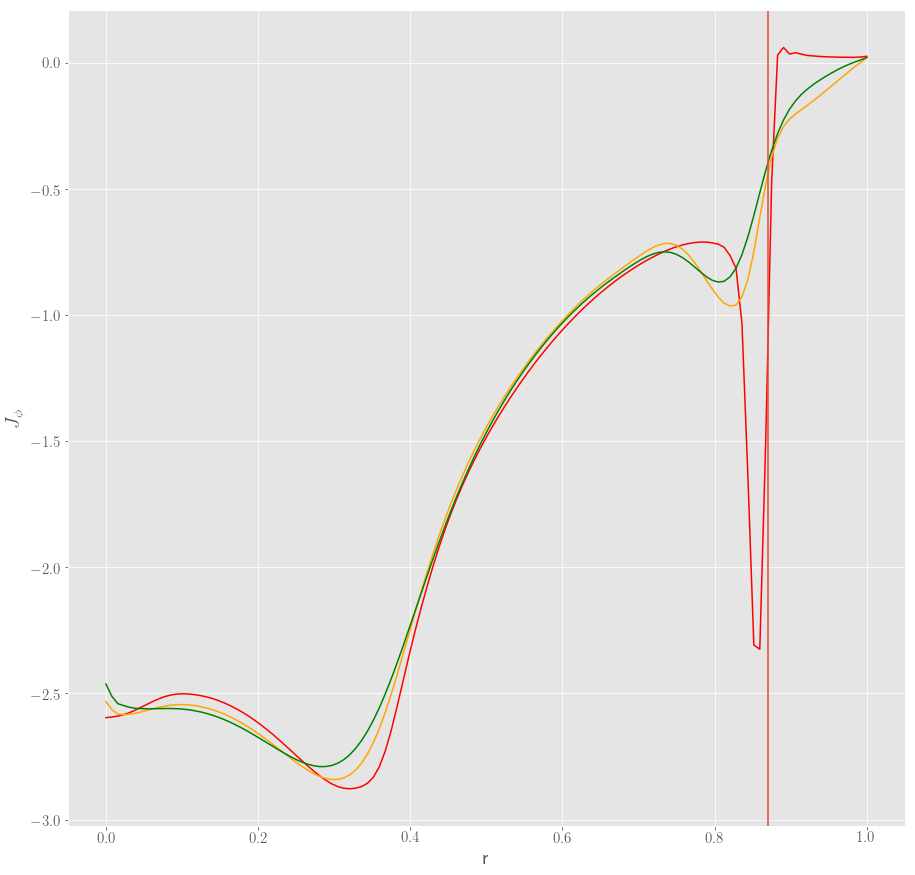

In [92]:
plt.figure(figsize=(15,15))
plt.plot(r,J3[:,0,0,0],"r")
plt.plot(r,J3[:,0,0,20],"orange")
plt.plot(r,J3[:,0,0,-1],"g")
#plt.plot(r,dJ30[:,0,0,-1],"b")
plt.axvline(x=0.87)
plt.xlabel("r")
plt.ylabel(r"$J_{\phi}$")
plt.show()

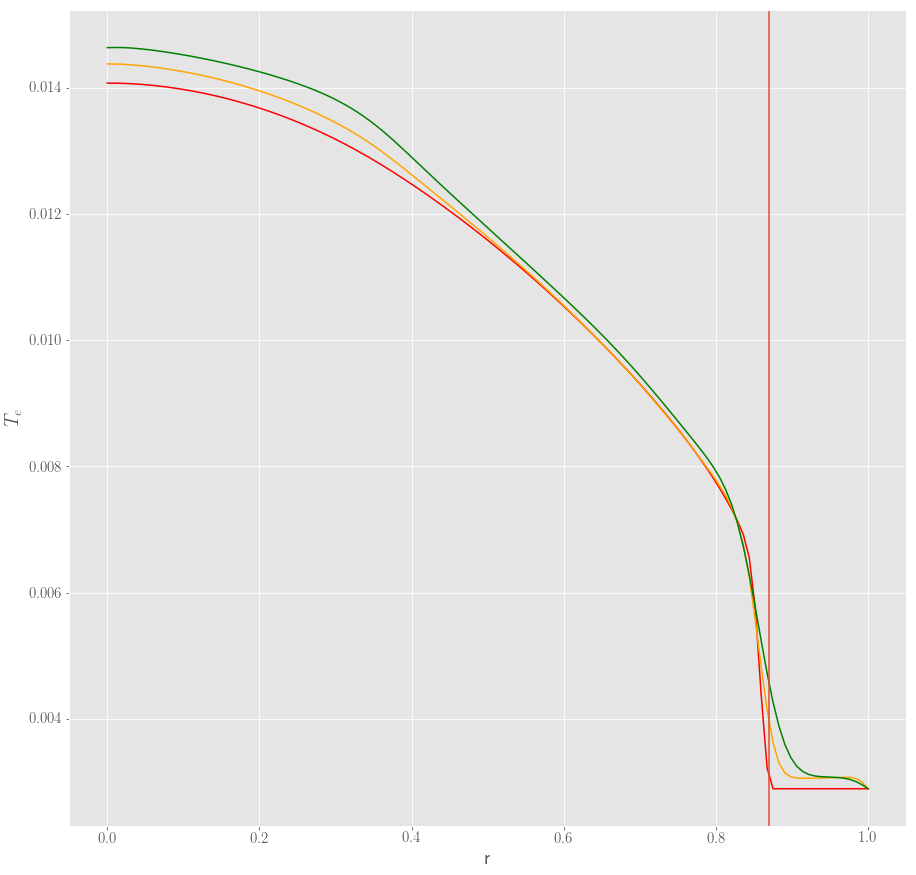

In [93]:
plt.figure(figsize=(15,15))
plt.plot(r,Te[:,0,0,0],"r")
plt.plot(r,Te[:,0,0,20],"orange")
plt.plot(r,Te[:,0,0,-1],"g")
#plt.plot(r,dJ30[:,0,0,-1],"b")
plt.axvline(x=0.87)
plt.xlabel("r")
plt.ylabel(r"$T_e$")
plt.show()

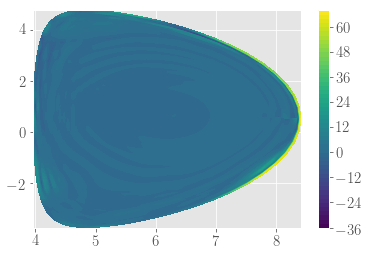

In [22]:
plt.contourf(pxr.X[:,:,0]*alpha,pxr.Z[:,:,0]*alpha,dJ30[:,:,0,-1],60)
plt.colorbar()
plt.show()

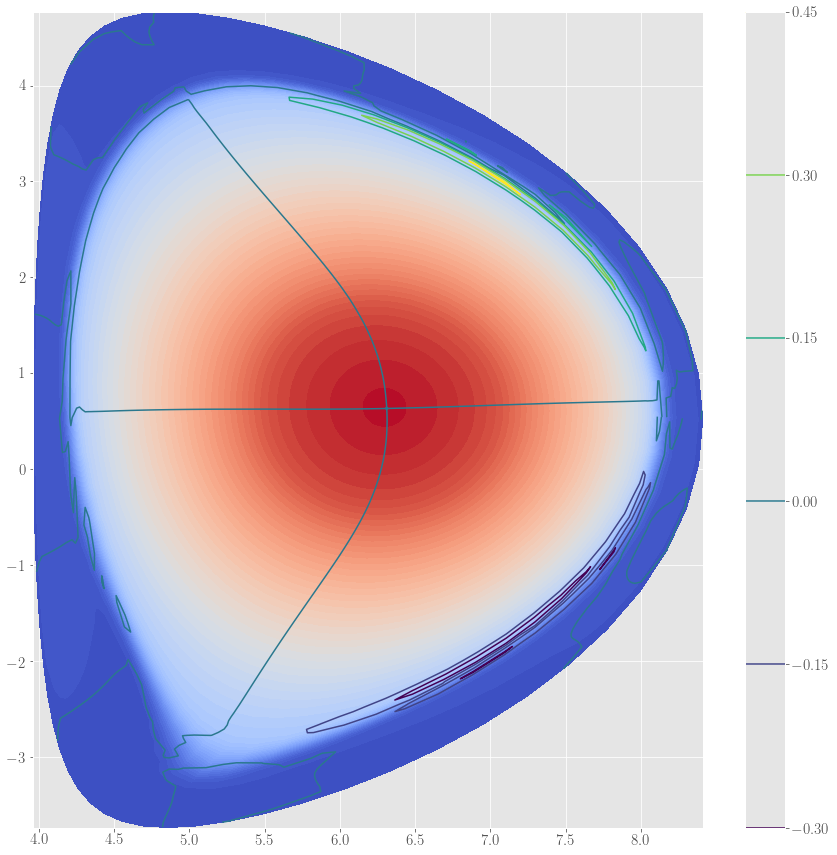

In [122]:
plt.figure(figsize=(15,15))
plt.contourf(pxr.X[:,:,0]*alpha,pxr.Z[:,:,0]*alpha,Te[:,:,0,-1],60,cmap="coolwarm")
plt.contour(pxr.X[:,:,0]*alpha,pxr.Z[:,:,0]*alpha,psit[:,:,0])
plt.colorbar()
plt.show()

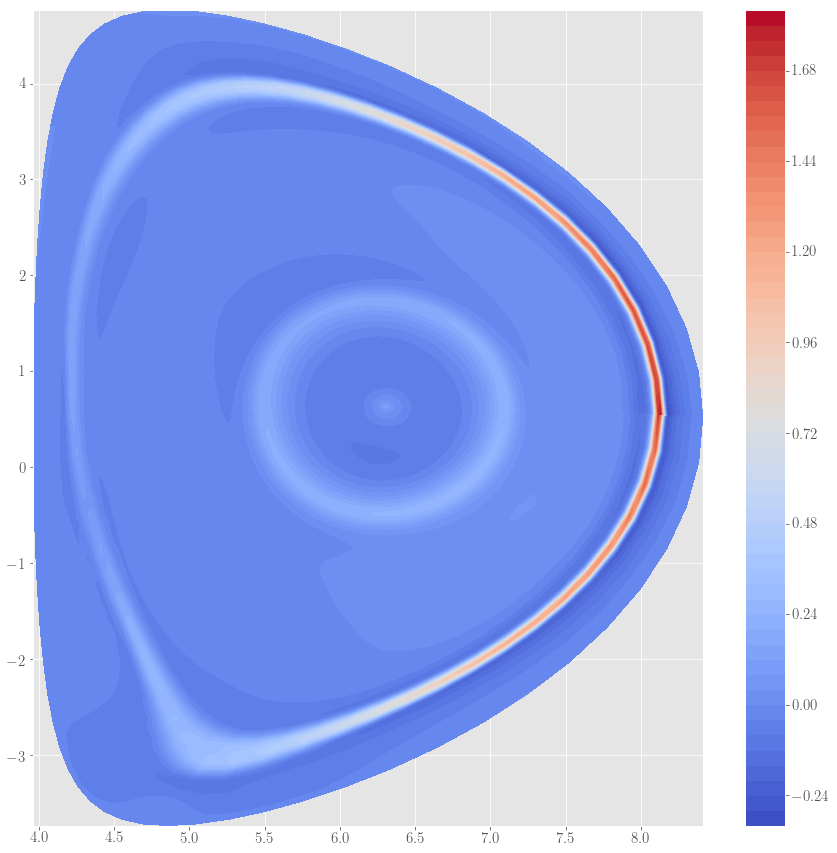

In [81]:
plt.figure(figsize=(15,15))
plt.contourf(pxr.X[:,:,0]*alpha,pxr.Z[:,:,0]*alpha,dJ30[:,:,0,-1],60,cmap="coolwarm")
plt.colorbar()
plt.show()

In [95]:
Te0 = Te[:,:,:,0]
Te_tor = np.mean(Te,axis=2)
dTe0 = Te-Te0[:,:,:,np.newaxis]
dTe_tor = Te - Te_tor[:,:,np.newaxis,:]

In [97]:
dTe_tor.shape

(129, 65, 33, 58)

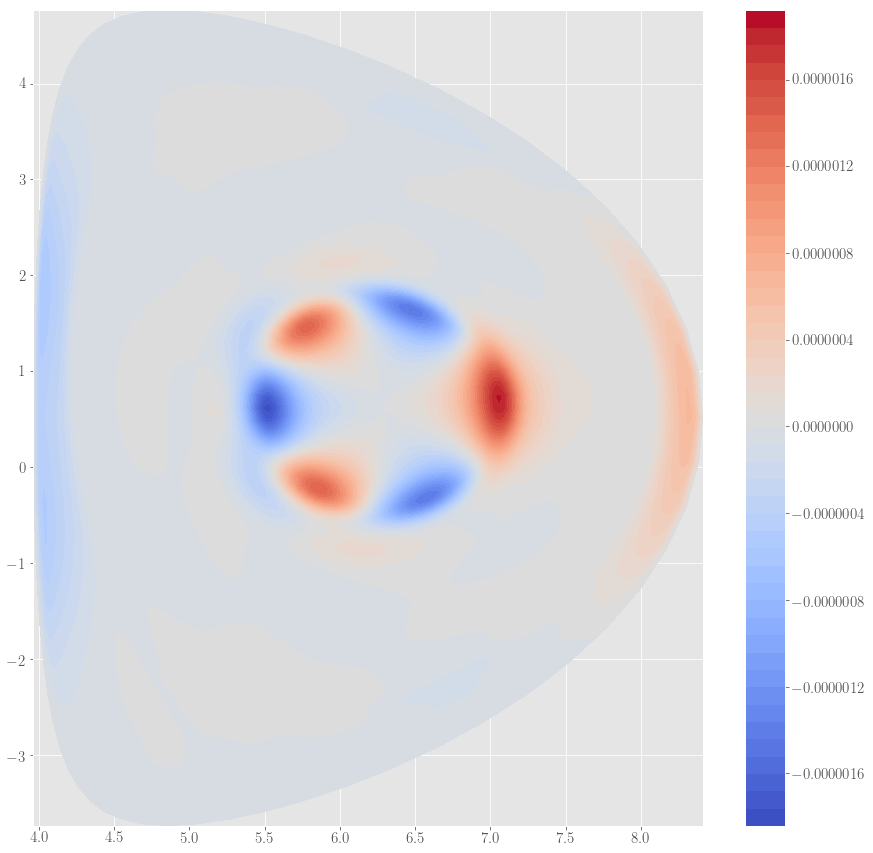

In [112]:
plt.figure(figsize=(15,15))
plt.contourf(pxr.X[:,:,0]*alpha,pxr.Z[:,:,0]*alpha,dTe_tor[:,:,0,50],60,cmap="coolwarm")
plt.colorbar()
plt.show()

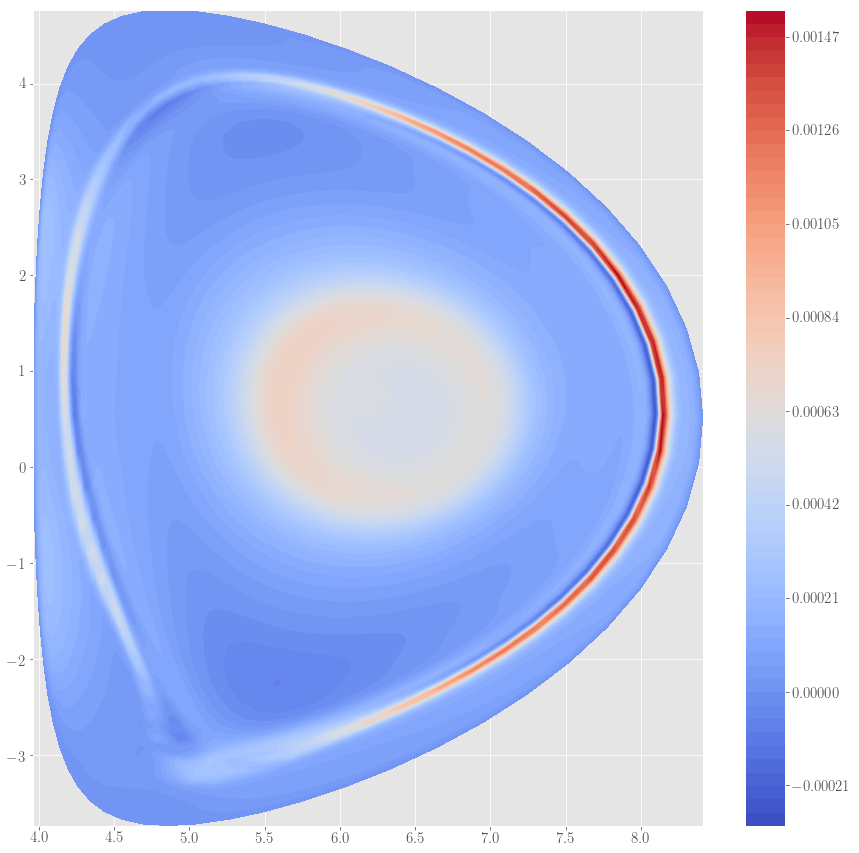

In [83]:
plt.figure(figsize=(15,15))
plt.contourf(pxr.X[:,:,0]*alpha,pxr.Z[:,:,0]*alpha,dTe0[:,:,0,-1],60,cmap="coolwarm")
plt.colorbar()
plt.show()

In [86]:
rho_0 = rho[:,:,:,0]
drho = rho-rho_0[:,:,:,np.newaxis]

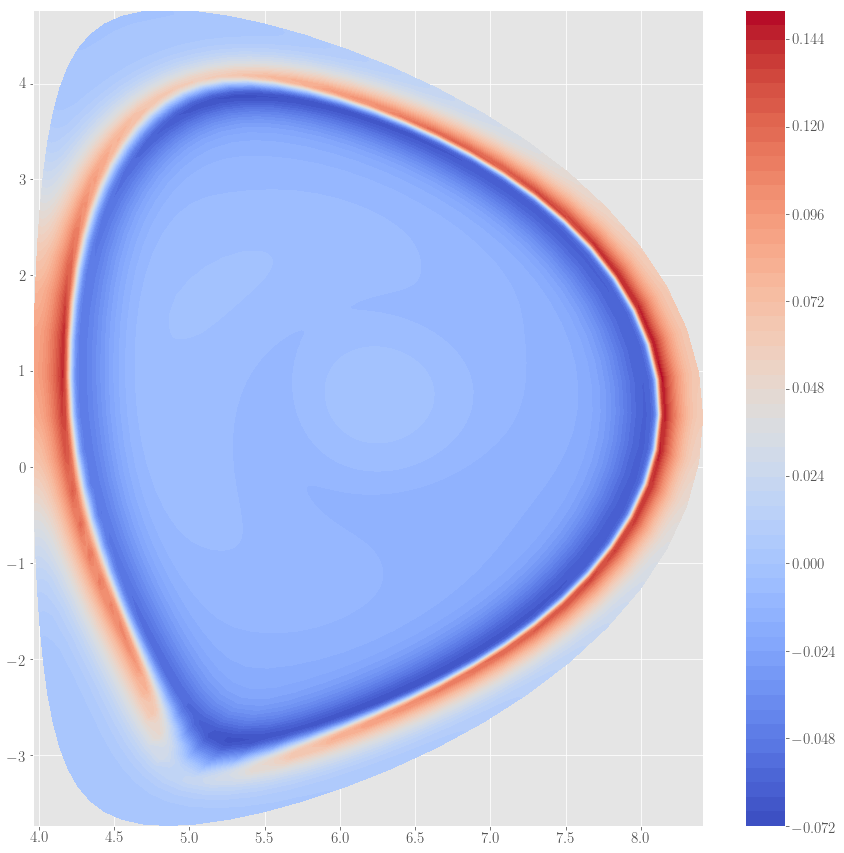

In [87]:
plt.figure(figsize=(15,15))
plt.contourf(pxr.X[:,:,0]*alpha,pxr.Z[:,:,0]*alpha,drho[:,:,0,-1],60,cmap="coolwarm")
plt.colorbar()
plt.show()

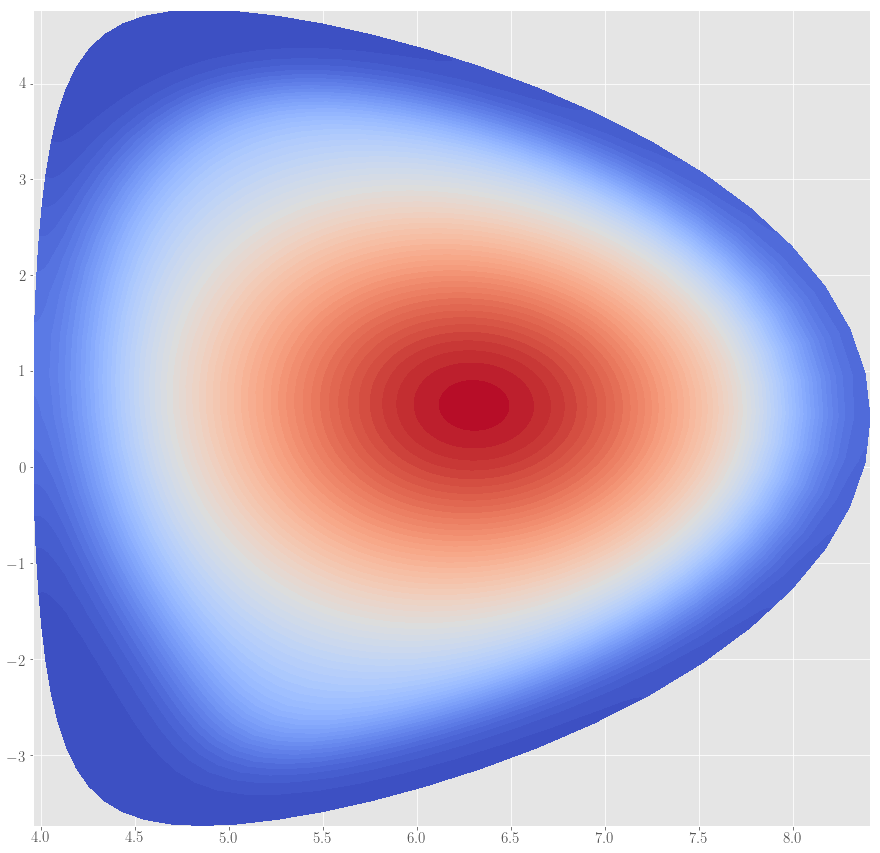

In [88]:
plt.figure(figsize=(15,15))
plt.contourf(pxr.X[:,:,0]*alpha,pxr.Z[:,:,0]*alpha,rho[:,:,0,-1],60,cmap="coolwarm")
plt.show()

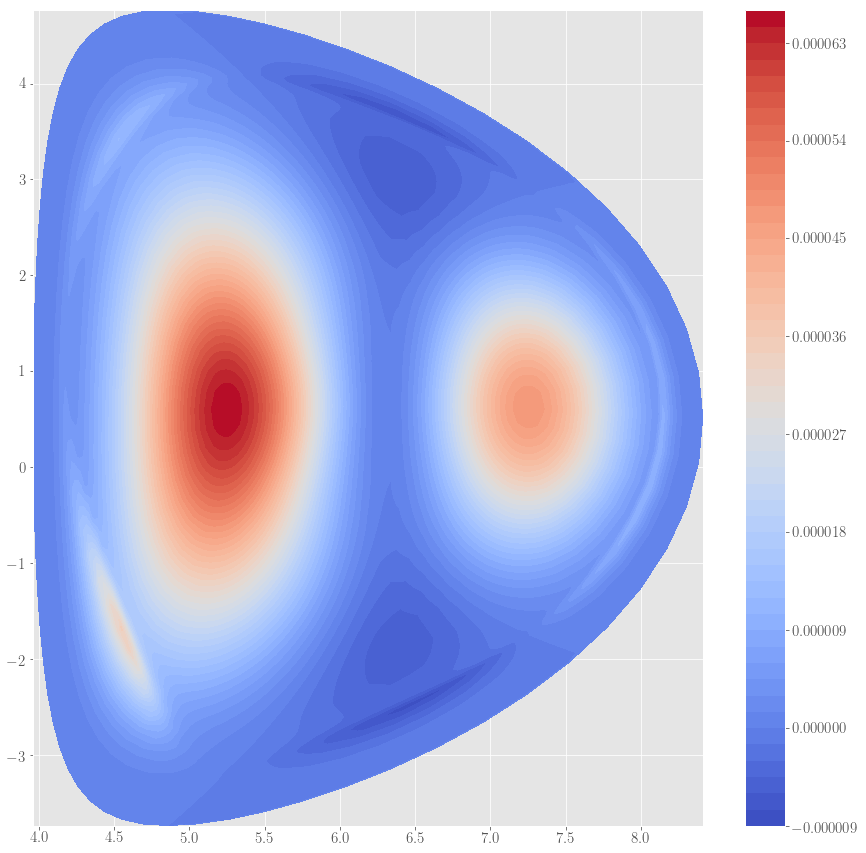

In [117]:
plt.figure(figsize=(15,15))
plt.contourf(pxr.X[:,:,0]*alpha,pxr.Z[:,:,0]*alpha,Vx[:,:,0,0],60,cmap="coolwarm")
plt.colorbar()
plt.show()

In [90]:
J10 = J1[:,:,:,0]
dJ1 = J1-J10[:,:,:,np.newaxis]
J20 = J2[:,:,:,0]
dJ2 = J2-J20[:,:,:,np.newaxis]

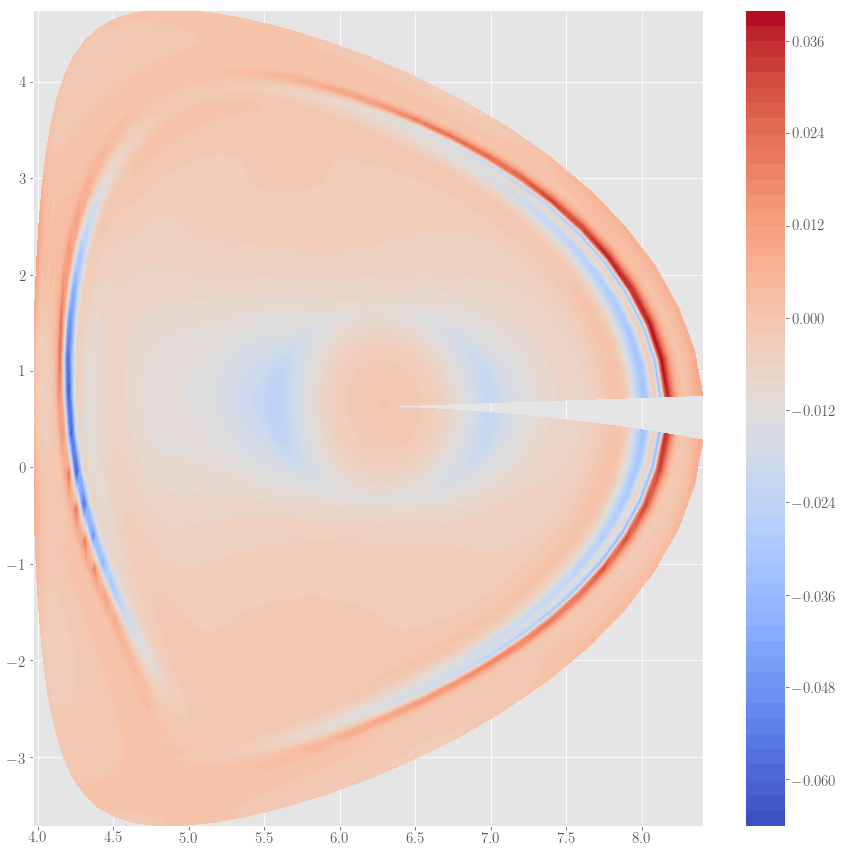

In [91]:
plt.figure(figsize=(15,15))
plt.contourf(pxr.Xc[:,:,0]*alpha,pxr.Zc[:,:,0]*alpha,dJ2[:,:,0,-1],60,cmap="coolwarm")
plt.colorbar()
plt.show()

In [21]:
def fun(x):
    return (x**(5/2))*(1-x)

In [31]:
xrange = np.linspace(0,1,100)

In [34]:
yrange = [fun_pert(x) for x in xrange]

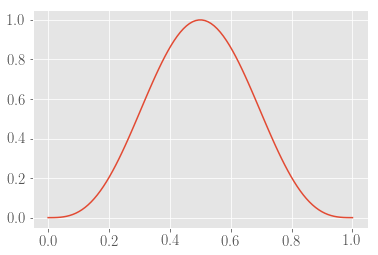

In [35]:
plt.plot(xrange,yrange)
plt.show()


In [33]:
def fun_pert(x):
    return np.sin(np.pi*x)**3